In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 0], [0, 0, 0, 0], [0, 0, 1, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.50892 stdev: 0.09523
Best fitness: 0.70748 - size: (2, 13) - species 3 - id 123
Average adjusted fitness: 0.261
Mean genetic distance 2.839, standard deviation 0.473
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 11.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55982 stdev: 0.08552
Best fitness: 0.76005 - size: (3, 14) - species 3 - id 371
Average adjusted fitness: 0.223
Mean genetic distance 2.922, standard deviation 0.452
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.765 sec (9.475 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57906 stdev: 0.09226
Best fitness: 0.76005 - size: (3, 14) - species 15 - id 371
Average adjusted fitness: 0.257
Mean genetic distance 3.016, standard deviation 0.458
Population of 203 members in 28 species
Total extinct

Population's average fitness: 0.65459 stdev: 0.10363
Best fitness: 0.80952 - size: (4, 18) - species 46 - id 1732
Average adjusted fitness: 0.364
Mean genetic distance 3.238, standard deviation 0.457
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 18.939 sec (20.812 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66076 stdev: 0.09816
Best fitness: 0.80952 - size: (4, 18) - species 46 - id 1732
Average adjusted fitness: 0.337
Mean genetic distance 3.245, standard deviation 0.470
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 20.759 sec (20.888 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66576 stdev: 0.09709
Best fitness: 0.80952 - size: (4, 18) - species 46 - id 1732
Average adjusted fitness: 0.316
Mean genetic distance 3.246, standard deviation 0.467
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 19.553 sec (21.009 average)

 

Population's average fitness: 0.66353 stdev: 0.10700
Best fitness: 0.83612 - size: (8, 22) - species 58 - id 6541
Average adjusted fitness: 0.257
Mean genetic distance 3.290, standard deviation 0.528
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 24.142 sec (24.531 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66410 stdev: 0.09974
Best fitness: 0.83612 - size: (8, 22) - species 58 - id 6541
Average adjusted fitness: 0.332
Mean genetic distance 3.295, standard deviation 0.526
Population of 206 members in 26 species
Total extinctions: 0
Generation time: 22.611 sec (24.097 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66258 stdev: 0.10453
Best fitness: 0.83859 - size: (8, 23) - species 58 - id 6853
Average adjusted fitness: 0.267
Mean genetic distance 3.264, standard deviation 0.543
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 22.903 sec (23.777 average)

 

Population's average fitness: 0.66707 stdev: 0.11558
Best fitness: 0.84787 - size: (10, 25) - species 58 - id 7151
Average adjusted fitness: 0.298
Mean genetic distance 3.259, standard deviation 0.582
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 25.669 sec (25.259 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.65696 stdev: 0.11773
Best fitness: 0.84787 - size: (10, 25) - species 58 - id 7151
Average adjusted fitness: 0.250
Mean genetic distance 3.210, standard deviation 0.632
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 26.047 sec (25.464 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.67169 stdev: 0.10332
Best fitness: 0.84787 - size: (10, 25) - species 58 - id 7151
Average adjusted fitness: 0.284
Mean genetic distance 3.201, standard deviation 0.634
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 25.825 sec (25.661 average)

Population's average fitness: 0.67261 stdev: 0.10072
Best fitness: 0.85962 - size: (13, 32) - species 70 - id 14085
Average adjusted fitness: 0.268
Mean genetic distance 3.067, standard deviation 0.612
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 28.477 sec (28.397 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.66878 stdev: 0.10516
Best fitness: 0.85962 - size: (13, 32) - species 70 - id 14085
Average adjusted fitness: 0.313
Mean genetic distance 3.096, standard deviation 0.578
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 28.353 sec (28.545 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.67035 stdev: 0.11151
Best fitness: 0.85962 - size: (13, 32) - species 70 - id 14085
Average adjusted fitness: 0.323
Mean genetic distance 3.130, standard deviation 0.565
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 28.050 sec (28.649 avera

Population's average fitness: 0.70510 stdev: 0.11225
Best fitness: 0.85962 - size: (13, 32) - species 70 - id 14085
Average adjusted fitness: 0.305
Mean genetic distance 3.147, standard deviation 0.558
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 29.784 sec (30.571 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.69437 stdev: 0.12064
Best fitness: 0.85962 - size: (13, 32) - species 70 - id 14085
Average adjusted fitness: 0.292
Mean genetic distance 3.108, standard deviation 0.565
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 29.216 sec (30.459 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.70280 stdev: 0.12009
Best fitness: 0.85962 - size: (13, 32) - species 70 - id 14085
Average adjusted fitness: 0.300
Mean genetic distance 3.163, standard deviation 0.571
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 31.675 sec (30.381 ave

Population's average fitness: 0.68462 stdev: 0.10986
Best fitness: 0.87137 - size: (20, 50) - species 72 - id 22035
Average adjusted fitness: 0.298
Mean genetic distance 3.243, standard deviation 0.584
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 32.813 sec (33.440 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.69448 stdev: 0.10969
Best fitness: 0.87137 - size: (20, 50) - species 72 - id 22035
Average adjusted fitness: 0.345
Mean genetic distance 3.266, standard deviation 0.593
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 33.497 sec (33.589 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.68841 stdev: 0.11478
Best fitness: 0.87137 - size: (20, 50) - species 72 - id 22035
Average adjusted fitness: 0.287
Mean genetic distance 3.272, standard deviation 0.619
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 34.542 sec (33.925 ave

Population's average fitness: 0.69110 stdev: 0.10743
Best fitness: 0.87137 - size: (20, 50) - species 72 - id 22035
Average adjusted fitness: 0.293
Mean genetic distance 3.141, standard deviation 0.626
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 33.691 sec (31.931 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.68412 stdev: 0.10838
Best fitness: 0.87137 - size: (20, 50) - species 72 - id 22035
Average adjusted fitness: 0.280
Mean genetic distance 3.185, standard deviation 0.628
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 31.887 sec (31.993 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.68963 stdev: 0.10045
Best fitness: 0.87137 - size: (20, 50) - species 72 - id 22035
Average adjusted fitness: 0.312
Mean genetic distance 3.190, standard deviation 0.633
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 31.756 sec (32.059 ave

Population's average fitness: 0.66054 stdev: 0.11713
Best fitness: 0.87199 - size: (23, 59) - species 100 - id 30707
Average adjusted fitness: 0.320
Mean genetic distance 3.109, standard deviation 0.623
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 36.069 sec (34.602 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.66409 stdev: 0.11808
Best fitness: 0.87199 - size: (23, 59) - species 100 - id 30707
Average adjusted fitness: 0.330
Mean genetic distance 3.124, standard deviation 0.589
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 36.773 sec (35.116 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.66429 stdev: 0.11130
Best fitness: 0.87199 - size: (23, 59) - species 100 - id 30707
Average adjusted fitness: 0.263
Mean genetic distance 3.161, standard deviation 0.590
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 35.594 sec (35.386 

Population's average fitness: 0.66684 stdev: 0.11973
Best fitness: 0.87384 - size: (23, 53) - species 94 - id 32991
Average adjusted fitness: 0.268
Mean genetic distance 3.072, standard deviation 0.567
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 43.502 sec (43.772 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.66656 stdev: 0.11303
Best fitness: 0.87384 - size: (23, 53) - species 94 - id 32991
Average adjusted fitness: 0.359
Mean genetic distance 3.052, standard deviation 0.579
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 42.897 sec (43.594 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.67418 stdev: 0.11365
Best fitness: 0.87384 - size: (23, 53) - species 94 - id 32991
Average adjusted fitness: 0.302
Mean genetic distance 3.056, standard deviation 0.557
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 44.655 sec (43.808 ave

Population's average fitness: 0.67292 stdev: 0.11152
Best fitness: 0.87570 - size: (23, 53) - species 94 - id 37071
Average adjusted fitness: 0.349
Mean genetic distance 2.963, standard deviation 0.561
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 44.614 sec (44.191 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.66570 stdev: 0.12188
Best fitness: 0.87570 - size: (23, 53) - species 94 - id 37071
Average adjusted fitness: 0.285
Mean genetic distance 2.958, standard deviation 0.535
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 45.813 sec (44.469 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.67223 stdev: 0.10836
Best fitness: 0.87570 - size: (23, 53) - species 94 - id 37071
Average adjusted fitness: 0.334
Mean genetic distance 2.991, standard deviation 0.558
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 46.401 sec (44.532 ave

Population's average fitness: 0.67447 stdev: 0.11895
Best fitness: 0.87570 - size: (23, 53) - species 94 - id 37071
Average adjusted fitness: 0.321
Mean genetic distance 2.796, standard deviation 0.528
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 36.266 sec (36.856 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.68225 stdev: 0.10789
Best fitness: 0.87570 - size: (23, 53) - species 94 - id 37071
Average adjusted fitness: 0.308
Mean genetic distance 2.800, standard deviation 0.537
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 35.501 sec (36.499 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.68069 stdev: 0.10705
Best fitness: 0.87570 - size: (23, 53) - species 94 - id 37071
Average adjusted fitness: 0.287
Mean genetic distance 2.800, standard deviation 0.535
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 35.700 sec (36.221 ave

Population's average fitness: 0.67690 stdev: 0.11444
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.300
Mean genetic distance 2.827, standard deviation 0.400
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 35.080 sec (34.859 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.67974 stdev: 0.12206
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.277
Mean genetic distance 2.861, standard deviation 0.410
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 36.305 sec (34.989 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.69187 stdev: 0.10576
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.297
Mean genetic distance 2.863, standard deviation 0.416
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 38.309 sec (35.291 

Mean genetic distance 2.811, standard deviation 0.451
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 39.751 sec (39.543 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.68363 stdev: 0.13364
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.294
Mean genetic distance 2.831, standard deviation 0.450
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 41.002 sec (39.949 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.70584 stdev: 0.10970
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.299
Mean genetic distance 2.857, standard deviation 0.453
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 40.726 sec (40.192 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.68771 stdev: 0.11700
Best fitness: 0.87693 - size: (25, 62) - speci

Population's average fitness: 0.67531 stdev: 0.12417
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.275
Mean genetic distance 2.745, standard deviation 0.480
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 39.838 sec (37.940 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.68115 stdev: 0.12591
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.280
Mean genetic distance 2.737, standard deviation 0.480
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 39.581 sec (38.174 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.68388 stdev: 0.11122
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.297
Mean genetic distance 2.750, standard deviation 0.480
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 39.072 sec (38.333 ave

Population's average fitness: 0.67782 stdev: 0.11312
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.276
Mean genetic distance 2.780, standard deviation 0.427
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 50.088 sec (47.119 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.66868 stdev: 0.11905
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.280
Mean genetic distance 2.793, standard deviation 0.420
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 47.186 sec (47.337 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.67700 stdev: 0.11563
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.337
Mean genetic distance 2.764, standard deviation 0.438
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 47.836 sec (47.517 

Mean genetic distance 2.771, standard deviation 0.433
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 51.661 sec (51.820 average)

 ****** Running generation 383 ****** 

Population's average fitness: 0.67283 stdev: 0.11568
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.297
Mean genetic distance 2.780, standard deviation 0.438
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 55.979 sec (52.511 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.66217 stdev: 0.11761
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.320
Mean genetic distance 2.764, standard deviation 0.459
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 51.218 sec (52.738 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.66295 stdev: 0.12493
Best fitness: 0.87693 - size: (25, 62) - speci

Population's average fitness: 0.70133 stdev: 0.10826
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.328
Mean genetic distance 2.743, standard deviation 0.387
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 37.130 sec (39.627 average)

 ****** Running generation 407 ****** 

Population's average fitness: 0.69130 stdev: 0.10890
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.289
Mean genetic distance 2.751, standard deviation 0.396
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 37.570 sec (39.847 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.70240 stdev: 0.11594
Best fitness: 0.87693 - size: (25, 62) - species 100 - id 45584
Average adjusted fitness: 0.309
Mean genetic distance 2.736, standard deviation 0.407
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 38.085 sec (40.088 

Mean genetic distance 2.783, standard deviation 0.493
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 39.227 sec (40.961 average)

 ****** Running generation 430 ****** 

Population's average fitness: 0.68276 stdev: 0.12186
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.358
Mean genetic distance 2.789, standard deviation 0.454
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 41.013 sec (41.243 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.68957 stdev: 0.12068
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.390
Mean genetic distance 2.778, standard deviation 0.454
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 49.926 sec (42.054 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.69797 stdev: 0.11455
Best fitness: 0.88312 - size: (24, 63) - specie

Population's average fitness: 0.69673 stdev: 0.11059
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.292
Mean genetic distance 2.749, standard deviation 0.453
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 42.126 sec (43.451 average)

 ****** Running generation 454 ****** 

Population's average fitness: 0.68026 stdev: 0.11609
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.270
Mean genetic distance 2.754, standard deviation 0.451
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 41.674 sec (43.202 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.69110 stdev: 0.11589
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.383
Mean genetic distance 2.734, standard deviation 0.477
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 42.960 sec (43.598 

Mean genetic distance 2.799, standard deviation 0.477
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 49.611 sec (51.542 average)

 ****** Running generation 477 ****** 

Population's average fitness: 0.67074 stdev: 0.12682
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.332
Mean genetic distance 2.769, standard deviation 0.465
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 51.990 sec (51.139 average)

 ****** Running generation 478 ****** 

Population's average fitness: 0.67556 stdev: 0.11701
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.300
Mean genetic distance 2.787, standard deviation 0.475
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 51.176 sec (50.613 average)

 ****** Running generation 479 ****** 

Population's average fitness: 0.67433 stdev: 0.11819
Best fitness: 0.88312 - size: (24, 63) - speci

Population's average fitness: 0.69072 stdev: 0.11633
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.302
Mean genetic distance 2.928, standard deviation 0.510
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 49.339 sec (53.962 average)

 ****** Running generation 501 ****** 

Population's average fitness: 0.68381 stdev: 0.11682
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.358
Mean genetic distance 2.911, standard deviation 0.510
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 54.994 sec (54.170 average)

 ****** Running generation 502 ****** 

Population's average fitness: 0.69021 stdev: 0.12149
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.302
Mean genetic distance 2.907, standard deviation 0.492
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 49.110 sec (53.612 

Mean genetic distance 2.886, standard deviation 0.497
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 56.271 sec (54.305 average)

 ****** Running generation 524 ****** 

Population's average fitness: 0.66687 stdev: 0.12637
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.294
Mean genetic distance 2.889, standard deviation 0.506
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 50.610 sec (53.846 average)

 ****** Running generation 525 ****** 

Population's average fitness: 0.70529 stdev: 0.10855
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.303
Mean genetic distance 2.868, standard deviation 0.504
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 55.312 sec (53.873 average)

 ****** Running generation 526 ****** 

Population's average fitness: 0.68820 stdev: 0.11010
Best fitness: 0.88312 - size: (24, 63) - speci

Population's average fitness: 0.69375 stdev: 0.11455
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.326
Mean genetic distance 2.893, standard deviation 0.543
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 51.098 sec (58.315 average)

 ****** Running generation 548 ****** 

Population's average fitness: 0.68266 stdev: 0.11245
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.278
Mean genetic distance 2.899, standard deviation 0.539
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 59.422 sec (57.811 average)

 ****** Running generation 549 ****** 

Population's average fitness: 0.69127 stdev: 0.11339
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.289
Mean genetic distance 2.902, standard deviation 0.539
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 51.328 sec (55.841 

Mean genetic distance 2.860, standard deviation 0.497
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 45.159 sec (50.524 average)

 ****** Running generation 571 ****** 

Population's average fitness: 0.67971 stdev: 0.10839
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.339
Mean genetic distance 2.884, standard deviation 0.478
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 48.783 sec (49.908 average)

 ****** Running generation 572 ****** 

Population's average fitness: 0.67095 stdev: 0.10921
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.249
Mean genetic distance 2.905, standard deviation 0.470
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 45.772 sec (49.304 average)

 ****** Running generation 573 ****** 

Population's average fitness: 0.66352 stdev: 0.12039
Best fitness: 0.88312 - size: (24, 63) - speci

Population's average fitness: 0.67292 stdev: 0.11692
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.304
Mean genetic distance 2.825, standard deviation 0.535
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 52.504 sec (58.230 average)

 ****** Running generation 595 ****** 

Population's average fitness: 0.68931 stdev: 0.11375
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.368
Mean genetic distance 2.820, standard deviation 0.522
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 66.327 sec (58.597 average)

 ****** Running generation 596 ****** 

Population's average fitness: 0.67980 stdev: 0.12201
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.365
Mean genetic distance 2.809, standard deviation 0.530
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 55.575 sec (58.518 

Mean genetic distance 2.868, standard deviation 0.524
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 50.507 sec (53.847 average)

 ****** Running generation 618 ****** 

Population's average fitness: 0.69552 stdev: 0.10712
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.297
Mean genetic distance 2.834, standard deviation 0.532
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 64.567 sec (55.039 average)

 ****** Running generation 619 ****** 

Population's average fitness: 0.68173 stdev: 0.11862
Best fitness: 0.88312 - size: (24, 63) - species 100 - id 70785
Average adjusted fitness: 0.289
Mean genetic distance 2.844, standard deviation 0.514
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 51.872 sec (54.699 average)

 ****** Running generation 620 ****** 

Population's average fitness: 0.68990 stdev: 0.11941
Best fitness: 0.88312 - size: (24, 63) - speci

Population's average fitness: 0.67096 stdev: 0.11995
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.273
Mean genetic distance 2.747, standard deviation 0.434
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 62.482 sec (63.785 average)

 ****** Running generation 642 ****** 

Population's average fitness: 0.67641 stdev: 0.11379
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.272
Mean genetic distance 2.749, standard deviation 0.416
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 63.975 sec (63.481 average)

 ****** Running generation 643 ****** 

Population's average fitness: 0.66518 stdev: 0.12093
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.316
Mean genetic distance 2.756, standard deviation 0.414
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 63.887 sec (63.9

Mean genetic distance 2.574, standard deviation 0.436
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 55.803 sec (54.843 average)

 ****** Running generation 665 ****** 

Population's average fitness: 0.67548 stdev: 0.11046
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.303
Mean genetic distance 2.569, standard deviation 0.431
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 54.582 sec (54.978 average)

 ****** Running generation 666 ****** 

Population's average fitness: 0.67753 stdev: 0.10546
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.285
Mean genetic distance 2.605, standard deviation 0.380
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 54.495 sec (55.105 average)

 ****** Running generation 667 ****** 

Population's average fitness: 0.67217 stdev: 0.12101
Best fitness: 0.88374 - size: (37, 78) - specie

Population's average fitness: 0.67574 stdev: 0.12320
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.373
Mean genetic distance 2.652, standard deviation 0.404
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 68.973 sec (66.682 average)

 ****** Running generation 689 ****** 

Population's average fitness: 0.67731 stdev: 0.10985
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.277
Mean genetic distance 2.639, standard deviation 0.415
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 66.767 sec (66.615 average)

 ****** Running generation 690 ****** 

Population's average fitness: 0.68380 stdev: 0.10553
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.282
Mean genetic distance 2.608, standard deviation 0.422
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 61.429 sec (66.0

Mean genetic distance 2.702, standard deviation 0.483
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 55.195 sec (60.055 average)

 ****** Running generation 712 ****** 

Population's average fitness: 0.68557 stdev: 0.12361
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.303
Mean genetic distance 2.685, standard deviation 0.490
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 54.218 sec (59.320 average)

 ****** Running generation 713 ****** 

Population's average fitness: 0.68036 stdev: 0.11969
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.349
Mean genetic distance 2.689, standard deviation 0.488
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 56.911 sec (58.610 average)

 ****** Running generation 714 ****** 

Population's average fitness: 0.68074 stdev: 0.12464
Best fitness: 0.88374 - size: (37, 78) - spe

Population's average fitness: 0.67075 stdev: 0.11710
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.342
Mean genetic distance 2.754, standard deviation 0.543
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 58.928 sec (56.275 average)

 ****** Running generation 736 ****** 

Population's average fitness: 0.67960 stdev: 0.11448
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.282
Mean genetic distance 2.713, standard deviation 0.545
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 58.372 sec (56.843 average)

 ****** Running generation 737 ****** 

Population's average fitness: 0.66927 stdev: 0.10914
Best fitness: 0.88374 - size: (37, 78) - species 214 - id 109857
Average adjusted fitness: 0.269
Mean genetic distance 2.699, standard deviation 0.561
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 54.615 sec (57.047

Population's average fitness: 0.61845 stdev: 0.09710
Best fitness: 0.79963 - size: (6, 20) - species 20 - id 1247
Average adjusted fitness: 0.230
Mean genetic distance 3.117, standard deviation 0.460
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 19.677 sec (17.740 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63163 stdev: 0.09346
Best fitness: 0.82251 - size: (7, 21) - species 20 - id 1664
Average adjusted fitness: 0.296
Mean genetic distance 3.138, standard deviation 0.470
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 19.509 sec (18.197 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62435 stdev: 0.09680
Best fitness: 0.82251 - size: (7, 21) - species 20 - id 1664
Average adjusted fitness: 0.295
Mean genetic distance 3.152, standard deviation 0.474
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 22.628 sec (18.815 average)

 

Population's average fitness: 0.64973 stdev: 0.11421
Best fitness: 0.87384 - size: (6, 21) - species 11 - id 4272
Average adjusted fitness: 0.247
Mean genetic distance 3.208, standard deviation 0.526
Population of 207 members in 23 species
Total extinctions: 0
Generation time: 20.937 sec (20.280 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.64394 stdev: 0.11776
Best fitness: 0.87384 - size: (6, 21) - species 11 - id 4272
Average adjusted fitness: 0.319
Mean genetic distance 3.189, standard deviation 0.524
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 23.532 sec (20.715 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.66376 stdev: 0.09758
Best fitness: 0.87384 - size: (6, 21) - species 11 - id 4272
Average adjusted fitness: 0.319
Mean genetic distance 3.200, standard deviation 0.529
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 23.643 sec (21.134 average)

 

Population's average fitness: 0.68412 stdev: 0.10152
Best fitness: 0.87817 - size: (6, 22) - species 43 - id 8463
Average adjusted fitness: 0.284
Mean genetic distance 3.250, standard deviation 0.568
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 27.725 sec (23.640 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.67965 stdev: 0.11555
Best fitness: 0.87817 - size: (6, 22) - species 43 - id 8463
Average adjusted fitness: 0.306
Mean genetic distance 3.276, standard deviation 0.577
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 25.237 sec (23.781 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.67352 stdev: 0.11377
Best fitness: 0.87817 - size: (6, 22) - species 43 - id 8463
Average adjusted fitness: 0.271
Mean genetic distance 3.270, standard deviation 0.558
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 25.844 sec (24.222 average)

 

Population's average fitness: 0.68147 stdev: 0.11267
Best fitness: 0.88126 - size: (10, 28) - species 53 - id 12299
Average adjusted fitness: 0.306
Mean genetic distance 3.308, standard deviation 0.607
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 28.337 sec (26.280 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.69177 stdev: 0.11268
Best fitness: 0.88126 - size: (10, 28) - species 53 - id 12299
Average adjusted fitness: 0.295
Mean genetic distance 3.297, standard deviation 0.594
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 27.402 sec (26.256 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.68707 stdev: 0.10877
Best fitness: 0.88312 - size: (11, 27) - species 53 - id 12813
Average adjusted fitness: 0.287
Mean genetic distance 3.318, standard deviation 0.584
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 25.101 sec (26.172 avera

Population's average fitness: 0.69298 stdev: 0.10056
Best fitness: 0.88312 - size: (11, 27) - species 65 - id 12813
Average adjusted fitness: 0.294
Mean genetic distance 3.246, standard deviation 0.626
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 24.441 sec (25.365 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.69496 stdev: 0.10079
Best fitness: 0.88312 - size: (11, 27) - species 65 - id 12813
Average adjusted fitness: 0.274
Mean genetic distance 3.225, standard deviation 0.616
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 24.599 sec (25.011 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.69842 stdev: 0.11245
Best fitness: 0.88312 - size: (11, 27) - species 65 - id 12813
Average adjusted fitness: 0.322
Mean genetic distance 3.192, standard deviation 0.625
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 25.126 sec (25.029 ave

Population's average fitness: 0.70597 stdev: 0.11446
Best fitness: 0.89301 - size: (13, 33) - species 53 - id 20129
Average adjusted fitness: 0.325
Mean genetic distance 2.958, standard deviation 0.519
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 32.890 sec (29.196 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.71333 stdev: 0.11266
Best fitness: 0.89301 - size: (13, 33) - species 53 - id 20129
Average adjusted fitness: 0.442
Mean genetic distance 2.957, standard deviation 0.540
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 29.628 sec (29.364 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.72166 stdev: 0.11588
Best fitness: 0.89301 - size: (13, 33) - species 53 - id 20129
Average adjusted fitness: 0.391
Mean genetic distance 2.950, standard deviation 0.516
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 30.331 sec (29.616 ave

Population's average fitness: 0.71781 stdev: 0.11201
Best fitness: 0.89672 - size: (13, 34) - species 53 - id 24182
Average adjusted fitness: 0.311
Mean genetic distance 2.887, standard deviation 0.563
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 37.030 sec (35.854 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.72088 stdev: 0.12318
Best fitness: 0.89672 - size: (13, 34) - species 53 - id 24182
Average adjusted fitness: 0.344
Mean genetic distance 2.897, standard deviation 0.522
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 39.552 sec (36.399 average)

 ****** Running generation 155 ****** 

Population's average fitness: 0.71185 stdev: 0.11490
Best fitness: 0.89672 - size: (13, 34) - species 53 - id 24182
Average adjusted fitness: 0.320
Mean genetic distance 2.916, standard deviation 0.517
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 38.571 sec (36.222 ave

Population's average fitness: 0.71656 stdev: 0.11444
Best fitness: 0.90353 - size: (18, 42) - species 77 - id 27013
Average adjusted fitness: 0.318
Mean genetic distance 3.030, standard deviation 0.541
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 40.649 sec (39.193 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.70821 stdev: 0.11635
Best fitness: 0.90353 - size: (18, 42) - species 77 - id 27013
Average adjusted fitness: 0.310
Mean genetic distance 3.043, standard deviation 0.562
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 38.770 sec (39.484 average)

 ****** Running generation 179 ****** 

Population's average fitness: 0.71952 stdev: 0.12010
Best fitness: 0.90353 - size: (18, 42) - species 77 - id 27013
Average adjusted fitness: 0.320
Mean genetic distance 3.025, standard deviation 0.572
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 40.986 sec (39.890 ave

Population's average fitness: 0.72413 stdev: 0.11625
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.320
Mean genetic distance 3.106, standard deviation 0.552
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 41.272 sec (38.593 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.71571 stdev: 0.11741
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.360
Mean genetic distance 3.080, standard deviation 0.563
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 42.022 sec (38.915 average)

 ****** Running generation 203 ****** 

Population's average fitness: 0.71885 stdev: 0.11999
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.367
Mean genetic distance 3.085, standard deviation 0.572
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 38.281 sec (38.946 ave

Population's average fitness: 0.70540 stdev: 0.12617
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.302
Mean genetic distance 3.037, standard deviation 0.606
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 41.421 sec (44.717 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.70931 stdev: 0.11756
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.421
Mean genetic distance 3.054, standard deviation 0.584
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 40.947 sec (44.222 average)

 ****** Running generation 227 ****** 

Population's average fitness: 0.69904 stdev: 0.11902
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.279
Mean genetic distance 3.041, standard deviation 0.600
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 40.225 sec (43.831 ave

Population's average fitness: 0.70044 stdev: 0.11977
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.315
Mean genetic distance 2.928, standard deviation 0.549
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 48.342 sec (45.428 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.70260 stdev: 0.10627
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.319
Mean genetic distance 2.918, standard deviation 0.557
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 45.999 sec (45.894 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.71121 stdev: 0.10424
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.338
Mean genetic distance 2.917, standard deviation 0.580
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 48.165 sec (46.576 aver

Population's average fitness: 0.70233 stdev: 0.11329
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.336
Mean genetic distance 2.995, standard deviation 0.541
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 46.610 sec (48.637 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.71299 stdev: 0.11081
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.312
Mean genetic distance 2.986, standard deviation 0.548
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 48.140 sec (48.385 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.71140 stdev: 0.11249
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.384
Mean genetic distance 3.001, standard deviation 0.538
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 45.384 sec (47.918 ave

Population's average fitness: 0.70242 stdev: 0.12174
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.360
Mean genetic distance 2.927, standard deviation 0.550
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 49.983 sec (49.626 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.69865 stdev: 0.11963
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.309
Mean genetic distance 2.915, standard deviation 0.578
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 49.155 sec (49.514 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.69913 stdev: 0.12359
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.301
Mean genetic distance 2.945, standard deviation 0.583
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 49.172 sec (49.081 ave

Population's average fitness: 0.70677 stdev: 0.12655
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.383
Mean genetic distance 2.999, standard deviation 0.556
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 51.963 sec (50.608 average)

 ****** Running generation 322 ****** 

Population's average fitness: 0.70428 stdev: 0.11800
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.305
Mean genetic distance 3.026, standard deviation 0.583
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 52.138 sec (50.775 average)

 ****** Running generation 323 ****** 

Population's average fitness: 0.71877 stdev: 0.12063
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.408
Mean genetic distance 3.025, standard deviation 0.590
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 52.794 sec (51.118 ave

Population's average fitness: 0.71846 stdev: 0.11635
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.358
Mean genetic distance 3.004, standard deviation 0.650
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 48.497 sec (49.188 average)

 ****** Running generation 346 ****** 

Population's average fitness: 0.71613 stdev: 0.11317
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.321
Mean genetic distance 2.996, standard deviation 0.651
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 48.859 sec (49.088 average)

 ****** Running generation 347 ****** 

Population's average fitness: 0.69977 stdev: 0.11527
Best fitness: 0.90724 - size: (18, 42) - species 94 - id 31939
Average adjusted fitness: 0.295
Mean genetic distance 2.979, standard deviation 0.646
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 49.616 sec (49.147 ave

Population's average fitness: 0.70500 stdev: 0.10794
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.372
Mean genetic distance 2.728, standard deviation 0.610
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 48.888 sec (50.116 average)

 ****** Running generation 370 ****** 

Population's average fitness: 0.70092 stdev: 0.10933
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.314
Mean genetic distance 2.745, standard deviation 0.580
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 48.392 sec (50.084 average)

 ****** Running generation 371 ****** 

Population's average fitness: 0.69734 stdev: 0.12069
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.357
Mean genetic distance 2.752, standard deviation 0.598
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 50.560 sec (50.085 averag

Population's average fitness: 0.70213 stdev: 0.12306
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.304
Mean genetic distance 2.563, standard deviation 0.414
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 54.656 sec (56.223 average)

 ****** Running generation 394 ****** 

Population's average fitness: 0.69809 stdev: 0.11696
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.306
Mean genetic distance 2.535, standard deviation 0.441
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 56.167 sec (56.278 average)

 ****** Running generation 395 ****** 

Population's average fitness: 0.69144 stdev: 0.12195
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.310
Mean genetic distance 2.536, standard deviation 0.427
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 53.363 sec (56.145 averag

Population's average fitness: 0.70309 stdev: 0.11670
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.306
Mean genetic distance 2.645, standard deviation 0.441
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 50.065 sec (54.985 average)

 ****** Running generation 418 ****** 

Population's average fitness: 0.71470 stdev: 0.11586
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.371
Mean genetic distance 2.658, standard deviation 0.450
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 51.633 sec (54.869 average)

 ****** Running generation 419 ****** 

Population's average fitness: 0.70343 stdev: 0.11813
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.306
Mean genetic distance 2.693, standard deviation 0.422
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 51.362 sec (54.229 ave

Population's average fitness: 0.72397 stdev: 0.12019
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.326
Mean genetic distance 2.733, standard deviation 0.451
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 45.953 sec (49.251 average)

 ****** Running generation 442 ****** 

Population's average fitness: 0.72337 stdev: 0.12057
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.325
Mean genetic distance 2.750, standard deviation 0.453
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 46.154 sec (48.971 average)

 ****** Running generation 443 ****** 

Population's average fitness: 0.72691 stdev: 0.11757
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.324
Mean genetic distance 2.776, standard deviation 0.469
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 46.161 sec (48.376 ave

Population's average fitness: 0.70182 stdev: 0.12053
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.336
Mean genetic distance 2.860, standard deviation 0.507
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 47.028 sec (44.282 average)

 ****** Running generation 466 ****** 

Population's average fitness: 0.71225 stdev: 0.12713
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.323
Mean genetic distance 2.869, standard deviation 0.520
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 46.144 sec (44.699 average)

 ****** Running generation 467 ****** 

Population's average fitness: 0.71260 stdev: 0.13521
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.335
Mean genetic distance 2.860, standard deviation 0.503
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 45.144 sec (44.892 ave

Population's average fitness: 0.72235 stdev: 0.10982
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.284
Mean genetic distance 2.925, standard deviation 0.521
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 45.136 sec (44.955 average)

 ****** Running generation 490 ****** 

Population's average fitness: 0.70491 stdev: 0.12531
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.391
Mean genetic distance 2.933, standard deviation 0.502
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 45.291 sec (44.786 average)

 ****** Running generation 491 ****** 

Population's average fitness: 0.73295 stdev: 0.10625
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.332
Mean genetic distance 2.955, standard deviation 0.516
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 48.961 sec (45.190 ave

Population's average fitness: 0.73244 stdev: 0.12031
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.386
Mean genetic distance 2.923, standard deviation 0.496
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 49.867 sec (51.036 average)

 ****** Running generation 514 ****** 

Population's average fitness: 0.71416 stdev: 0.12591
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.314
Mean genetic distance 2.931, standard deviation 0.514
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 50.001 sec (50.755 average)

 ****** Running generation 515 ****** 

Population's average fitness: 0.71464 stdev: 0.12230
Best fitness: 0.91280 - size: (19, 44) - species 94 - id 61375
Average adjusted fitness: 0.380
Mean genetic distance 2.871, standard deviation 0.566
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 48.570 sec (49.562 ave

Population's average fitness: 0.69250 stdev: 0.12431
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.406
Mean genetic distance 2.755, standard deviation 0.471
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 50.082 sec (53.163 average)

 ****** Running generation 538 ****** 

Population's average fitness: 0.69044 stdev: 0.12091
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.292
Mean genetic distance 2.776, standard deviation 0.463
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 49.639 sec (52.583 average)

 ****** Running generation 539 ****** 

Population's average fitness: 0.68862 stdev: 0.12097
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.401
Mean genetic distance 2.783, standard deviation 0.471
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 50.308 sec (51.783 

Mean genetic distance 2.806, standard deviation 0.536
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 46.740 sec (51.310 average)

 ****** Running generation 561 ****** 

Population's average fitness: 0.70126 stdev: 0.12028
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.316
Mean genetic distance 2.790, standard deviation 0.566
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 47.683 sec (50.507 average)

 ****** Running generation 562 ****** 

Population's average fitness: 0.70199 stdev: 0.12834
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.407
Mean genetic distance 2.782, standard deviation 0.558
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 47.260 sec (49.577 average)

 ****** Running generation 563 ****** 

Population's average fitness: 0.71707 stdev: 0.11369
Best fitness: 0.91280 - size: (25, 55) - species 

Population's average fitness: 0.71858 stdev: 0.11331
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.321
Mean genetic distance 2.858, standard deviation 0.488
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 50.773 sec (49.679 average)

 ****** Running generation 585 ****** 

Population's average fitness: 0.71659 stdev: 0.12306
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.359
Mean genetic distance 2.874, standard deviation 0.497
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 50.477 sec (49.806 average)

 ****** Running generation 586 ****** 

Population's average fitness: 0.72319 stdev: 0.12024
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.357
Mean genetic distance 2.873, standard deviation 0.519
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 50.863 sec (50.033 

Mean genetic distance 2.728, standard deviation 0.488
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 48.317 sec (49.453 average)

 ****** Running generation 608 ****** 

Population's average fitness: 0.72115 stdev: 0.10974
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.325
Mean genetic distance 2.719, standard deviation 0.488
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 47.314 sec (49.290 average)

 ****** Running generation 609 ****** 

Population's average fitness: 0.72151 stdev: 0.12299
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.334
Mean genetic distance 2.722, standard deviation 0.484
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 47.788 sec (48.888 average)

 ****** Running generation 610 ****** 

Population's average fitness: 0.72816 stdev: 0.11874
Best fitness: 0.91280 - size: (25, 55) - species 

Population's average fitness: 0.72108 stdev: 0.11649
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.324
Mean genetic distance 2.739, standard deviation 0.462
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 50.034 sec (49.711 average)

 ****** Running generation 632 ****** 

Population's average fitness: 0.73997 stdev: 0.11523
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.341
Mean genetic distance 2.763, standard deviation 0.449
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 49.344 sec (49.855 average)

 ****** Running generation 633 ****** 

Population's average fitness: 0.73721 stdev: 0.11406
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.330
Mean genetic distance 2.789, standard deviation 0.443
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 49.282 sec (50.023 

Mean genetic distance 2.697, standard deviation 0.522
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 49.936 sec (52.441 average)

 ****** Running generation 655 ****** 

Population's average fitness: 0.71194 stdev: 0.11866
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.422
Mean genetic distance 2.720, standard deviation 0.504
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 48.897 sec (52.276 average)

 ****** Running generation 656 ****** 

Population's average fitness: 0.71580 stdev: 0.11299
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.316
Mean genetic distance 2.742, standard deviation 0.501
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 49.134 sec (51.948 average)

 ****** Running generation 657 ****** 

Population's average fitness: 0.70752 stdev: 0.11518
Best fitness: 0.91280 - size: (25, 55) - species

Population's average fitness: 0.71453 stdev: 0.11169
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.327
Mean genetic distance 2.805, standard deviation 0.441
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 51.972 sec (51.502 average)

 ****** Running generation 679 ****** 

Population's average fitness: 0.72008 stdev: 0.11451
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.443
Mean genetic distance 2.799, standard deviation 0.447
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 50.981 sec (51.671 average)

 ****** Running generation 680 ****** 

Population's average fitness: 0.72518 stdev: 0.11405
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.338
Mean genetic distance 2.800, standard deviation 0.440
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 50.295 sec (51.817 

Mean genetic distance 2.905, standard deviation 0.531
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 52.004 sec (51.683 average)

 ****** Running generation 702 ****** 

Population's average fitness: 0.72200 stdev: 0.11497
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.326
Mean genetic distance 2.926, standard deviation 0.522
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 51.276 sec (50.881 average)

 ****** Running generation 703 ****** 

Population's average fitness: 0.73399 stdev: 0.10965
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.341
Mean genetic distance 2.905, standard deviation 0.539
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 50.442 sec (50.666 average)

 ****** Running generation 704 ****** 

Population's average fitness: 0.71282 stdev: 0.11288
Best fitness: 0.91280 - size: (25, 55) - speci

Population's average fitness: 0.72930 stdev: 0.11377
Best fitness: 0.91280 - size: (25, 55) - species 174 - id 92627
Average adjusted fitness: 0.333
Mean genetic distance 2.772, standard deviation 0.507
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 49.261 sec (47.587 average)

 ****** Running generation 726 ****** 

Population's average fitness: 0.73015 stdev: 0.11014
Best fitness: 0.91280 - size: (19, 44) - species 225 - id 61375
Average adjusted fitness: 0.324
Mean genetic distance 2.845, standard deviation 0.494
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 47.877 sec (47.635 average)

 ****** Running generation 727 ****** 

Population's average fitness: 0.71556 stdev: 0.12235
Best fitness: 0.91280 - size: (19, 44) - species 225 - id 61375
Average adjusted fitness: 0.313
Mean genetic distance 2.811, standard deviation 0.498
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 48.512 sec (47.780 

Mean genetic distance 2.725, standard deviation 0.496
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 48.635 sec (49.435 average)

 ****** Running generation 749 ****** 

Population's average fitness: 0.72090 stdev: 0.11224
Best fitness: 0.91280 - size: (19, 44) - species 225 - id 61375
Average adjusted fitness: 0.368
Mean genetic distance 2.714, standard deviation 0.491
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 51.864 sec (49.578 average)
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.48026 stdev: 0.09217
Best fitness: 0.71985 - size: (2, 13) - species 6 - id 79
Average adjusted fitness: 0.236
Mean genetic distance 2.855, standard deviation 0.494
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 14.657 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52954 stdev: 0.09571
Best fitness: 0.71985 - size: (

Mean genetic distance 3.197, standard deviation 0.483
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 19.911 sec (19.948 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64336 stdev: 0.09606
Best fitness: 0.78726 - size: (4, 17) - species 5 - id 1547
Average adjusted fitness: 0.242
Mean genetic distance 3.211, standard deviation 0.489
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 19.403 sec (20.009 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63915 stdev: 0.10250
Best fitness: 0.78726 - size: (4, 17) - species 5 - id 1547
Average adjusted fitness: 0.239
Mean genetic distance 3.208, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 19.531 sec (20.035 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63324 stdev: 0.10440
Best fitness: 0.78726 - size: (4, 17) - species 5 - id 15

Mean genetic distance 3.184, standard deviation 0.547
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 22.526 sec (22.283 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64939 stdev: 0.11470
Best fitness: 0.80767 - size: (7, 26) - species 24 - id 6610
Average adjusted fitness: 0.256
Mean genetic distance 3.150, standard deviation 0.540
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 21.903 sec (22.336 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.65411 stdev: 0.10303
Best fitness: 0.80891 - size: (7, 24) - species 11 - id 6895
Average adjusted fitness: 0.273
Mean genetic distance 3.127, standard deviation 0.547
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 22.764 sec (22.519 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65709 stdev: 0.10632
Best fitness: 0.80891 - size: (7, 24) - species 11 - id

Mean genetic distance 3.216, standard deviation 0.579
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 25.234 sec (24.494 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.67255 stdev: 0.10460
Best fitness: 0.82004 - size: (12, 34) - species 39 - id 7217
Average adjusted fitness: 0.304
Mean genetic distance 3.204, standard deviation 0.606
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 25.263 sec (24.651 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.67257 stdev: 0.10570
Best fitness: 0.82004 - size: (12, 34) - species 39 - id 7217
Average adjusted fitness: 0.270
Mean genetic distance 3.215, standard deviation 0.598
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 24.927 sec (24.749 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.66584 stdev: 0.11748
Best fitness: 0.82004 - size: (12, 34) - species 39 -

Mean genetic distance 3.150, standard deviation 0.623
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 28.416 sec (27.588 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.65734 stdev: 0.11962
Best fitness: 0.82746 - size: (6, 26) - species 34 - id 14631
Average adjusted fitness: 0.258
Mean genetic distance 3.141, standard deviation 0.621
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 27.600 sec (27.633 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.66603 stdev: 0.11304
Best fitness: 0.82870 - size: (6, 25) - species 34 - id 14964
Average adjusted fitness: 0.279
Mean genetic distance 3.108, standard deviation 0.612
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 28.145 sec (27.760 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.68620 stdev: 0.10591
Best fitness: 0.82870 - size: (6, 25) - species 34 - 

Population's average fitness: 0.66929 stdev: 0.12305
Best fitness: 0.85034 - size: (7, 28) - species 34 - id 15648
Average adjusted fitness: 0.369
Mean genetic distance 3.036, standard deviation 0.558
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 29.590 sec (30.202 average)

 ****** Running generation 119 ****** 

Population's average fitness: 0.65915 stdev: 0.13937
Best fitness: 0.85034 - size: (7, 28) - species 34 - id 15648
Average adjusted fitness: 0.344
Mean genetic distance 3.053, standard deviation 0.551
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 28.403 sec (30.065 average)

 ****** Running generation 120 ****** 

Population's average fitness: 0.65333 stdev: 0.13199
Best fitness: 0.85034 - size: (7, 28) - species 34 - id 15648
Average adjusted fitness: 0.263
Mean genetic distance 3.056, standard deviation 0.557
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 29.505 sec (29.987 averag

Population's average fitness: 0.68863 stdev: 0.10909
Best fitness: 0.85034 - size: (7, 28) - species 34 - id 15648
Average adjusted fitness: 0.286
Mean genetic distance 2.932, standard deviation 0.552
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 30.347 sec (30.508 average)

 ****** Running generation 143 ****** 

Population's average fitness: 0.67203 stdev: 0.12115
Best fitness: 0.85034 - size: (7, 28) - species 34 - id 15648
Average adjusted fitness: 0.270
Mean genetic distance 2.960, standard deviation 0.542
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 29.579 sec (29.985 average)

 ****** Running generation 144 ****** 

Population's average fitness: 0.67763 stdev: 0.11205
Best fitness: 0.85034 - size: (7, 28) - species 34 - id 15648
Average adjusted fitness: 0.318
Mean genetic distance 2.946, standard deviation 0.556
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 28.009 sec (29.151 averag

Population's average fitness: 0.68238 stdev: 0.11913
Best fitness: 0.85034 - size: (7, 28) - species 34 - id 15648
Average adjusted fitness: 0.314
Mean genetic distance 2.948, standard deviation 0.525
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 29.060 sec (29.032 average)

 ****** Running generation 167 ****** 

Population's average fitness: 0.69021 stdev: 0.12012
Best fitness: 0.85034 - size: (7, 28) - species 34 - id 15648
Average adjusted fitness: 0.301
Mean genetic distance 2.916, standard deviation 0.523
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 29.363 sec (29.118 average)

 ****** Running generation 168 ****** 

Population's average fitness: 0.69358 stdev: 0.12655
Best fitness: 0.85034 - size: (7, 28) - species 34 - id 15648
Average adjusted fitness: 0.292
Mean genetic distance 2.920, standard deviation 0.526
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 29.132 sec (29.129 averag

Population's average fitness: 0.65613 stdev: 0.13454
Best fitness: 0.85529 - size: (19, 51) - species 51 - id 30915
Average adjusted fitness: 0.277
Mean genetic distance 3.023, standard deviation 0.544
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 30.949 sec (31.059 average)

 ****** Running generation 191 ****** 

Population's average fitness: 0.65916 stdev: 0.13275
Best fitness: 0.85529 - size: (19, 51) - species 51 - id 30915
Average adjusted fitness: 0.233
Mean genetic distance 3.023, standard deviation 0.530
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 31.109 sec (31.091 average)

 ****** Running generation 192 ****** 

Population's average fitness: 0.66144 stdev: 0.12919
Best fitness: 0.85529 - size: (19, 51) - species 51 - id 30915
Average adjusted fitness: 0.225
Mean genetic distance 3.012, standard deviation 0.523
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 31.010 sec (31.120 ave

Population's average fitness: 0.66403 stdev: 0.12985
Best fitness: 0.85962 - size: (21, 54) - species 51 - id 33370
Average adjusted fitness: 0.328
Mean genetic distance 2.870, standard deviation 0.491
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 35.587 sec (35.617 average)

 ****** Running generation 215 ****** 

Population's average fitness: 0.66850 stdev: 0.12719
Best fitness: 0.85962 - size: (21, 54) - species 51 - id 33370
Average adjusted fitness: 0.312
Mean genetic distance 2.883, standard deviation 0.493
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 34.399 sec (35.736 average)

 ****** Running generation 216 ****** 

Population's average fitness: 0.66935 stdev: 0.13327
Best fitness: 0.85962 - size: (21, 54) - species 51 - id 33370
Average adjusted fitness: 0.264
Mean genetic distance 2.891, standard deviation 0.488
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 34.619 sec (35.650 ave

Population's average fitness: 0.66628 stdev: 0.13600
Best fitness: 0.85962 - size: (21, 54) - species 51 - id 33370
Average adjusted fitness: 0.333
Mean genetic distance 2.905, standard deviation 0.520
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 33.741 sec (34.399 average)

 ****** Running generation 239 ****** 

Population's average fitness: 0.66053 stdev: 0.13711
Best fitness: 0.85962 - size: (21, 54) - species 51 - id 33370
Average adjusted fitness: 0.292
Mean genetic distance 2.902, standard deviation 0.532
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 32.187 sec (33.971 average)

 ****** Running generation 240 ****** 

Population's average fitness: 0.67022 stdev: 0.13314
Best fitness: 0.85962 - size: (21, 54) - species 51 - id 33370
Average adjusted fitness: 0.341
Mean genetic distance 2.859, standard deviation 0.554
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 32.119 sec (33.681 ave

Population's average fitness: 0.66364 stdev: 0.12273
Best fitness: 0.85962 - size: (21, 54) - species 51 - id 33370
Average adjusted fitness: 0.257
Mean genetic distance 2.944, standard deviation 0.605
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 32.448 sec (32.959 average)

 ****** Running generation 263 ****** 

Population's average fitness: 0.65899 stdev: 0.12423
Best fitness: 0.85962 - size: (21, 54) - species 51 - id 33370
Average adjusted fitness: 0.337
Mean genetic distance 2.967, standard deviation 0.617
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 34.330 sec (33.078 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.66225 stdev: 0.13694
Best fitness: 0.85962 - size: (21, 54) - species 51 - id 33370
Average adjusted fitness: 0.309
Mean genetic distance 2.940, standard deviation 0.623
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 32.344 sec (32.837 ave

Population's average fitness: 0.65030 stdev: 0.13194
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.265
Mean genetic distance 2.974, standard deviation 0.561
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 33.321 sec (33.775 average)

 ****** Running generation 287 ****** 

Population's average fitness: 0.64664 stdev: 0.13338
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.250
Mean genetic distance 2.957, standard deviation 0.580
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 33.146 sec (33.716 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.64907 stdev: 0.13285
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.283
Mean genetic distance 2.945, standard deviation 0.577
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 32.191 sec (33.638 ave

Population's average fitness: 0.66686 stdev: 0.12840
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.311
Mean genetic distance 2.743, standard deviation 0.445
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 29.962 sec (30.318 average)

 ****** Running generation 311 ****** 

Population's average fitness: 0.66088 stdev: 0.12586
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.252
Mean genetic distance 2.783, standard deviation 0.448
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 29.313 sec (30.079 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.67187 stdev: 0.11752
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.265
Mean genetic distance 2.829, standard deviation 0.454
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 29.166 sec (29.869 ave

Population's average fitness: 0.68187 stdev: 0.12731
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.301
Mean genetic distance 2.873, standard deviation 0.540
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 28.578 sec (29.258 average)

 ****** Running generation 335 ****** 

Population's average fitness: 0.68861 stdev: 0.12068
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.288
Mean genetic distance 2.879, standard deviation 0.534
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 29.138 sec (29.205 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.68415 stdev: 0.12481
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.283
Mean genetic distance 2.878, standard deviation 0.524
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 29.145 sec (29.238 ave

Population's average fitness: 0.69384 stdev: 0.11698
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.340
Mean genetic distance 2.921, standard deviation 0.521
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 30.674 sec (31.370 average)

 ****** Running generation 359 ****** 

Population's average fitness: 0.67501 stdev: 0.12734
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.271
Mean genetic distance 2.974, standard deviation 0.528
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 30.098 sec (31.304 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.69763 stdev: 0.10987
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.292
Mean genetic distance 2.930, standard deviation 0.525
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 32.307 sec (31.103 ave

Population's average fitness: 0.67406 stdev: 0.12198
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.278
Mean genetic distance 2.958, standard deviation 0.484
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 36.511 sec (34.805 average)

 ****** Running generation 383 ****** 

Population's average fitness: 0.68518 stdev: 0.11433
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.283
Mean genetic distance 2.959, standard deviation 0.494
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 36.152 sec (35.248 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.68647 stdev: 0.11462
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.336
Mean genetic distance 2.955, standard deviation 0.478
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 36.108 sec (35.672 ave

Population's average fitness: 0.67599 stdev: 0.12724
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.276
Mean genetic distance 3.055, standard deviation 0.517
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 35.479 sec (35.170 average)

 ****** Running generation 407 ****** 

Population's average fitness: 0.68686 stdev: 0.11891
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.279
Mean genetic distance 3.059, standard deviation 0.506
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 35.425 sec (35.308 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.67246 stdev: 0.12420
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.274
Mean genetic distance 3.048, standard deviation 0.502
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 35.068 sec (35.350 ave

Population's average fitness: 0.67469 stdev: 0.13066
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.271
Mean genetic distance 3.071, standard deviation 0.547
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 35.810 sec (41.424 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.67444 stdev: 0.13226
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.270
Mean genetic distance 3.041, standard deviation 0.565
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 35.509 sec (41.574 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.69091 stdev: 0.11312
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.291
Mean genetic distance 3.051, standard deviation 0.565
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 33.955 sec (41.449 ave

Population's average fitness: 0.64989 stdev: 0.13913
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.247
Mean genetic distance 3.019, standard deviation 0.560
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 33.721 sec (38.052 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.64721 stdev: 0.14633
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.232
Mean genetic distance 2.998, standard deviation 0.587
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 35.796 sec (37.261 average)

 ****** Running generation 456 ****** 

Population's average fitness: 0.65867 stdev: 0.13263
Best fitness: 0.87879 - size: (22, 53) - species 51 - id 45943
Average adjusted fitness: 0.255
Mean genetic distance 2.980, standard deviation 0.558
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 39.154 sec (37.078 avera

Population's average fitness: 0.66519 stdev: 0.14359
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.269
Mean genetic distance 2.933, standard deviation 0.556
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 36.299 sec (37.565 average)

 ****** Running generation 479 ****** 

Population's average fitness: 0.65953 stdev: 0.13996
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.277
Mean genetic distance 2.931, standard deviation 0.554
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 35.155 sec (36.887 average)

 ****** Running generation 480 ****** 

Population's average fitness: 0.66090 stdev: 0.13541
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.261
Mean genetic distance 2.940, standard deviation 0.554
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 36.771 sec (36.407 ave

Population's average fitness: 0.66233 stdev: 0.14567
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.248
Mean genetic distance 3.058, standard deviation 0.568
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 39.303 sec (137.270 average)

 ****** Running generation 503 ****** 

Population's average fitness: 0.67679 stdev: 0.13503
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.252
Mean genetic distance 3.072, standard deviation 0.617
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 37.986 sec (137.437 average)

 ****** Running generation 504 ****** 

Population's average fitness: 0.67702 stdev: 0.14292
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.319
Mean genetic distance 3.071, standard deviation 0.621
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 36.761 sec (62.329 a

Population's average fitness: 0.64594 stdev: 0.14387
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.240
Mean genetic distance 3.090, standard deviation 0.547
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 43.613 sec (40.072 average)

 ****** Running generation 527 ****** 

Population's average fitness: 0.65282 stdev: 0.14167
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.223
Mean genetic distance 3.066, standard deviation 0.553
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 40.946 sec (40.350 average)

 ****** Running generation 528 ****** 

Population's average fitness: 0.65956 stdev: 0.13605
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.248
Mean genetic distance 3.057, standard deviation 0.548
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 44.679 sec (40.996 ave

Population's average fitness: 0.63460 stdev: 0.14720
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.238
Mean genetic distance 2.912, standard deviation 0.543
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 40.010 sec (42.808 average)

 ****** Running generation 551 ****** 

Population's average fitness: 0.65414 stdev: 0.13619
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.228
Mean genetic distance 2.930, standard deviation 0.507
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 38.964 sec (42.507 average)

 ****** Running generation 552 ****** 

Population's average fitness: 0.64807 stdev: 0.13938
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.234
Mean genetic distance 2.912, standard deviation 0.484
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 39.686 sec (42.087 avera

Population's average fitness: 0.65234 stdev: 0.13573
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.328
Mean genetic distance 2.908, standard deviation 0.521
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 49.553 sec (49.729 average)

 ****** Running generation 575 ****** 

Population's average fitness: 0.66797 stdev: 0.12347
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.270
Mean genetic distance 2.902, standard deviation 0.527
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 51.519 sec (49.693 average)

 ****** Running generation 576 ****** 

Population's average fitness: 0.68177 stdev: 0.12030
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.372
Mean genetic distance 2.917, standard deviation 0.503
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 48.469 sec (49.604 ave

Population's average fitness: 0.65520 stdev: 0.13903
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.254
Mean genetic distance 2.930, standard deviation 0.466
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 44.069 sec (43.545 average)

 ****** Running generation 599 ****** 

Population's average fitness: 0.68321 stdev: 0.12845
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.329
Mean genetic distance 2.912, standard deviation 0.475
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 40.932 sec (43.238 average)

 ****** Running generation 600 ****** 

Population's average fitness: 0.68129 stdev: 0.14126
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.295
Mean genetic distance 2.914, standard deviation 0.482
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 45.318 sec (43.539 ave

Population's average fitness: 0.67019 stdev: 0.13515
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.279
Mean genetic distance 2.958, standard deviation 0.475
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 40.207 sec (43.390 average)

 ****** Running generation 623 ****** 

Population's average fitness: 0.66476 stdev: 0.13467
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.327
Mean genetic distance 2.946, standard deviation 0.476
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 39.769 sec (43.102 average)

 ****** Running generation 624 ****** 

Population's average fitness: 0.66999 stdev: 0.13496
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.313
Mean genetic distance 2.943, standard deviation 0.478
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 38.907 sec (42.300 ave

Population's average fitness: 0.68611 stdev: 0.12971
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.336
Mean genetic distance 3.036, standard deviation 0.531
Population of 207 members in 18 species
Total extinctions: 0
Generation time: 41.802 sec (45.681 average)

 ****** Running generation 647 ****** 

Population's average fitness: 0.69397 stdev: 0.12877
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.333
Mean genetic distance 3.033, standard deviation 0.526
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 41.682 sec (44.868 average)

 ****** Running generation 648 ****** 

Population's average fitness: 0.69684 stdev: 0.12251
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.318
Mean genetic distance 3.049, standard deviation 0.517
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 42.207 sec (44.748 ave

Population's average fitness: 0.66656 stdev: 0.12662
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.288
Mean genetic distance 2.772, standard deviation 0.568
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 43.624 sec (43.851 average)

 ****** Running generation 671 ****** 

Population's average fitness: 0.66089 stdev: 0.13233
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.259
Mean genetic distance 2.825, standard deviation 0.558
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 41.906 sec (43.694 average)

 ****** Running generation 672 ****** 

Population's average fitness: 0.66865 stdev: 0.12379
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.259
Mean genetic distance 2.839, standard deviation 0.627
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 43.925 sec (43.729 averag

Population's average fitness: 0.66758 stdev: 0.12861
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.402
Mean genetic distance 2.764, standard deviation 0.484
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 35.457 sec (37.579 average)

 ****** Running generation 695 ****** 

Population's average fitness: 0.64973 stdev: 0.13747
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.256
Mean genetic distance 2.773, standard deviation 0.470
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 34.309 sec (37.228 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.63933 stdev: 0.13945
Best fitness: 0.88312 - size: (22, 52) - species 51 - id 81034
Average adjusted fitness: 0.229
Mean genetic distance 2.758, standard deviation 0.464
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 35.330 sec (37.005 avera

Population's average fitness: 0.66514 stdev: 0.13840
Best fitness: 0.88312 - size: (19, 45) - species 210 - id 122022
Average adjusted fitness: 0.275
Mean genetic distance 2.729, standard deviation 0.482
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 43.997 sec (41.458 average)

 ****** Running generation 719 ****** 

Population's average fitness: 0.66822 stdev: 0.14478
Best fitness: 0.88312 - size: (19, 45) - species 210 - id 122022
Average adjusted fitness: 0.388
Mean genetic distance 2.731, standard deviation 0.500
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 53.916 sec (42.504 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.64298 stdev: 0.14587
Best fitness: 0.88312 - size: (19, 45) - species 210 - id 122022
Average adjusted fitness: 0.301
Mean genetic distance 2.693, standard deviation 0.567
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 43.604 sec (43.01

Mean genetic distance 2.809, standard deviation 0.432
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 40.815 sec (39.738 average)

 ****** Running generation 742 ****** 

Population's average fitness: 0.67562 stdev: 0.13711
Best fitness: 0.88312 - size: (19, 45) - species 210 - id 122022
Average adjusted fitness: 0.308
Mean genetic distance 2.817, standard deviation 0.416
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 40.696 sec (40.156 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.67852 stdev: 0.13334
Best fitness: 0.88312 - size: (19, 45) - species 210 - id 122022
Average adjusted fitness: 0.287
Mean genetic distance 2.830, standard deviation 0.431
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 42.035 sec (40.582 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.66950 stdev: 0.14348
Best fitness: 0.88312 - size: (19, 45) - spe

Population's average fitness: 0.63974 stdev: 0.11136
Best fitness: 0.84045 - size: (5, 19) - species 7 - id 2165
Average adjusted fitness: 0.337
Mean genetic distance 3.204, standard deviation 0.488
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 21.870 sec (20.647 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63925 stdev: 0.10879
Best fitness: 0.84106 - size: (6, 21) - species 7 - id 2286
Average adjusted fitness: 0.343
Mean genetic distance 3.248, standard deviation 0.496
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 21.898 sec (20.730 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65214 stdev: 0.10770
Best fitness: 0.84106 - size: (6, 21) - species 7 - id 2286
Average adjusted fitness: 0.355
Mean genetic distance 3.226, standard deviation 0.496
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 21.433 sec (20.937 average)

 ***

Population's average fitness: 0.65273 stdev: 0.11189
Best fitness: 0.85343 - size: (7, 24) - species 7 - id 3429
Average adjusted fitness: 0.436
Mean genetic distance 3.267, standard deviation 0.550
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 21.903 sec (21.659 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.65810 stdev: 0.11213
Best fitness: 0.85343 - size: (7, 24) - species 7 - id 3429
Average adjusted fitness: 0.335
Mean genetic distance 3.301, standard deviation 0.538
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.133 sec (21.627 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.65687 stdev: 0.10581
Best fitness: 0.85343 - size: (7, 24) - species 7 - id 3429
Average adjusted fitness: 0.251
Mean genetic distance 3.294, standard deviation 0.571
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 22.499 sec (21.747 average)

 ***

Population's average fitness: 0.65242 stdev: 0.11653
Best fitness: 0.88312 - size: (9, 28) - species 7 - id 7823
Average adjusted fitness: 0.242
Mean genetic distance 3.318, standard deviation 0.548
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 26.241 sec (26.298 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.65962 stdev: 0.11489
Best fitness: 0.88312 - size: (9, 28) - species 7 - id 7823
Average adjusted fitness: 0.256
Mean genetic distance 3.318, standard deviation 0.551
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 26.287 sec (26.209 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.65566 stdev: 0.11717
Best fitness: 0.88312 - size: (9, 28) - species 7 - id 7823
Average adjusted fitness: 0.288
Mean genetic distance 3.372, standard deviation 0.566
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 26.313 sec (26.295 average)

 ***

Population's average fitness: 0.67093 stdev: 0.12860
Best fitness: 0.88621 - size: (13, 35) - species 61 - id 13139
Average adjusted fitness: 0.332
Mean genetic distance 3.274, standard deviation 0.612
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 28.272 sec (28.712 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.66857 stdev: 0.12572
Best fitness: 0.88621 - size: (13, 35) - species 61 - id 13139
Average adjusted fitness: 0.317
Mean genetic distance 3.286, standard deviation 0.596
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 28.285 sec (28.699 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.68129 stdev: 0.11124
Best fitness: 0.88621 - size: (13, 35) - species 61 - id 13139
Average adjusted fitness: 0.246
Mean genetic distance 3.275, standard deviation 0.597
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 28.307 sec (28.616 avera

Population's average fitness: 0.67645 stdev: 0.12340
Best fitness: 0.88868 - size: (15, 36) - species 73 - id 17031
Average adjusted fitness: 0.487
Mean genetic distance 3.176, standard deviation 0.629
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 32.660 sec (30.346 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.68625 stdev: 0.12697
Best fitness: 0.88868 - size: (15, 36) - species 73 - id 17031
Average adjusted fitness: 0.409
Mean genetic distance 3.173, standard deviation 0.619
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 30.781 sec (30.500 average)

 ****** Running generation 113 ****** 

Population's average fitness: 0.67875 stdev: 0.12137
Best fitness: 0.88868 - size: (15, 36) - species 73 - id 17031
Average adjusted fitness: 0.296
Mean genetic distance 3.168, standard deviation 0.626
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 31.358 sec (30.611 ave

Population's average fitness: 0.65905 stdev: 0.13618
Best fitness: 0.90662 - size: (16, 40) - species 61 - id 21243
Average adjusted fitness: 0.367
Mean genetic distance 3.205, standard deviation 0.687
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 33.563 sec (34.070 average)

 ****** Running generation 136 ****** 

Population's average fitness: 0.66878 stdev: 0.13374
Best fitness: 0.90662 - size: (16, 40) - species 61 - id 21243
Average adjusted fitness: 0.380
Mean genetic distance 3.208, standard deviation 0.691
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 33.443 sec (34.051 average)

 ****** Running generation 137 ****** 

Population's average fitness: 0.69128 stdev: 0.12216
Best fitness: 0.90662 - size: (16, 40) - species 61 - id 21243
Average adjusted fitness: 0.309
Mean genetic distance 3.217, standard deviation 0.684
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 33.482 sec (33.988 averag

Population's average fitness: 0.67424 stdev: 0.12165
Best fitness: 0.90662 - size: (16, 40) - species 81 - id 21243
Average adjusted fitness: 0.311
Mean genetic distance 3.254, standard deviation 0.569
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 37.816 sec (37.590 average)

 ****** Running generation 160 ****** 

Population's average fitness: 0.68233 stdev: 0.12378
Best fitness: 0.90662 - size: (16, 40) - species 81 - id 21243
Average adjusted fitness: 0.301
Mean genetic distance 3.250, standard deviation 0.579
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 37.019 sec (37.642 average)

 ****** Running generation 161 ****** 

Population's average fitness: 0.67800 stdev: 0.13119
Best fitness: 0.90662 - size: (16, 40) - species 81 - id 21243
Average adjusted fitness: 0.305
Mean genetic distance 3.211, standard deviation 0.617
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 36.923 sec (37.729 ave

Population's average fitness: 0.66982 stdev: 0.14436
Best fitness: 0.90971 - size: (17, 46) - species 99 - id 28396
Average adjusted fitness: 0.349
Mean genetic distance 3.186, standard deviation 0.590
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.810 sec (37.045 average)

 ****** Running generation 184 ****** 

Population's average fitness: 0.67662 stdev: 0.13598
Best fitness: 0.90971 - size: (17, 46) - species 99 - id 28396
Average adjusted fitness: 0.360
Mean genetic distance 3.155, standard deviation 0.598
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 36.662 sec (36.946 average)

 ****** Running generation 185 ****** 

Population's average fitness: 0.67394 stdev: 0.13706
Best fitness: 0.90971 - size: (17, 46) - species 99 - id 28396
Average adjusted fitness: 0.372
Mean genetic distance 3.067, standard deviation 0.625
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 37.037 sec (36.936 ave

Population's average fitness: 0.69243 stdev: 0.12567
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.277
Mean genetic distance 3.014, standard deviation 0.501
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 40.598 sec (40.434 average)

 ****** Running generation 208 ****** 

Population's average fitness: 0.68045 stdev: 0.12928
Best fitness: 0.91899 - size: (19, 47) - species 109 - id 34079
Average adjusted fitness: 0.295
Mean genetic distance 3.010, standard deviation 0.497
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 39.602 sec (40.402 average)

 ****** Running generation 209 ****** 

Population's average fitness: 0.69387 stdev: 0.12967
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.346
Mean genetic distance 3.028, standard deviation 0.512
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 40.187 sec (40.345 av

Population's average fitness: 0.69985 stdev: 0.11587
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.214
Mean genetic distance 2.932, standard deviation 0.536
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 42.343 sec (42.516 average)

 ****** Running generation 232 ****** 

Population's average fitness: 0.68209 stdev: 0.13125
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.357
Mean genetic distance 2.929, standard deviation 0.516
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 46.522 sec (43.115 average)

 ****** Running generation 233 ****** 

Population's average fitness: 0.68641 stdev: 0.12743
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.448
Mean genetic distance 2.924, standard deviation 0.507
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 42.246 sec (43.140 ave

Population's average fitness: 0.67495 stdev: 0.13701
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.401
Mean genetic distance 2.916, standard deviation 0.549
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 42.455 sec (44.305 average)

 ****** Running generation 256 ****** 

Population's average fitness: 0.66570 stdev: 0.13295
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.447
Mean genetic distance 2.932, standard deviation 0.539
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 41.890 sec (43.651 average)

 ****** Running generation 257 ****** 

Population's average fitness: 0.68991 stdev: 0.13653
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.327
Mean genetic distance 2.928, standard deviation 0.515
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 43.522 sec (43.201 ave

Population's average fitness: 0.67038 stdev: 0.12997
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.325
Mean genetic distance 2.863, standard deviation 0.554
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 45.562 sec (44.719 average)

 ****** Running generation 280 ****** 

Population's average fitness: 0.67800 stdev: 0.13800
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.371
Mean genetic distance 2.827, standard deviation 0.545
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 48.162 sec (45.076 average)

 ****** Running generation 281 ****** 

Population's average fitness: 0.68397 stdev: 0.13935
Best fitness: 0.91899 - size: (19, 47) - species 99 - id 34079
Average adjusted fitness: 0.371
Mean genetic distance 2.777, standard deviation 0.514
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 44.861 sec (45.161 ave

Population's average fitness: 0.69743 stdev: 0.12151
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.366
Mean genetic distance 2.832, standard deviation 0.417
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 40.639 sec (41.160 average)

 ****** Running generation 304 ****** 

Population's average fitness: 0.67381 stdev: 0.13683
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.445
Mean genetic distance 2.849, standard deviation 0.417
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 41.233 sec (40.866 average)

 ****** Running generation 305 ****** 

Population's average fitness: 0.68849 stdev: 0.13465
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.376
Mean genetic distance 2.874, standard deviation 0.409
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 41.483 sec (40.750 ave

Population's average fitness: 0.68480 stdev: 0.13900
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.403
Mean genetic distance 2.853, standard deviation 0.483
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 38.404 sec (39.503 average)

 ****** Running generation 328 ****** 

Population's average fitness: 0.70094 stdev: 0.13692
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.335
Mean genetic distance 2.868, standard deviation 0.499
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 35.183 sec (39.606 average)

 ****** Running generation 329 ****** 

Population's average fitness: 0.67792 stdev: 0.14876
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.395
Mean genetic distance 2.874, standard deviation 0.502
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 34.195 sec (39.592 ave

Population's average fitness: 0.68372 stdev: 0.13913
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.292
Mean genetic distance 2.935, standard deviation 0.492
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 32.990 sec (33.173 average)

 ****** Running generation 352 ****** 

Population's average fitness: 0.68801 stdev: 0.14647
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.477
Mean genetic distance 2.952, standard deviation 0.488
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 33.409 sec (33.365 average)

 ****** Running generation 353 ****** 

Population's average fitness: 0.67636 stdev: 0.14697
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.449
Mean genetic distance 2.959, standard deviation 0.496
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 33.356 sec (33.460 ave

Population's average fitness: 0.66784 stdev: 0.14209
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.394
Mean genetic distance 2.862, standard deviation 0.474
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 36.972 sec (36.839 average)

 ****** Running generation 376 ****** 

Population's average fitness: 0.67451 stdev: 0.14400
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.339
Mean genetic distance 2.874, standard deviation 0.476
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 37.154 sec (36.868 average)

 ****** Running generation 377 ****** 

Population's average fitness: 0.68154 stdev: 0.13563
Best fitness: 0.91899 - size: (16, 41) - species 94 - id 49501
Average adjusted fitness: 0.289
Mean genetic distance 2.897, standard deviation 0.497
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 37.219 sec (36.855 ave

Mean genetic distance 2.835, standard deviation 0.502
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 35.951 sec (35.009 average)

 ****** Running generation 399 ****** 

Population's average fitness: 0.68829 stdev: 0.14389
Best fitness: 0.91899 - size: (16, 41) - species 162 - id 49501
Average adjusted fitness: 0.445
Mean genetic distance 2.835, standard deviation 0.499
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 33.647 sec (34.588 average)

 ****** Running generation 400 ****** 

Population's average fitness: 0.68802 stdev: 0.14587
Best fitness: 0.91899 - size: (16, 41) - species 162 - id 49501
Average adjusted fitness: 0.461
Mean genetic distance 2.861, standard deviation 0.486
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 33.706 sec (34.448 average)

 ****** Running generation 401 ****** 

Population's average fitness: 0.66830 stdev: 0.15783
Best fitness: 0.91899 - size: (16, 41) - speci

Population's average fitness: 0.68630 stdev: 0.13512
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.369
Mean genetic distance 2.885, standard deviation 0.505
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 34.834 sec (34.721 average)

 ****** Running generation 423 ****** 

Population's average fitness: 0.69064 stdev: 0.12885
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.370
Mean genetic distance 2.881, standard deviation 0.496
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.448 sec (34.879 average)

 ****** Running generation 424 ****** 

Population's average fitness: 0.68077 stdev: 0.13449
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.380
Mean genetic distance 2.885, standard deviation 0.490
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 38.337 sec (35.305 

Mean genetic distance 2.881, standard deviation 0.521
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 38.990 sec (39.417 average)

 ****** Running generation 446 ****** 

Population's average fitness: 0.67482 stdev: 0.13696
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.254
Mean genetic distance 2.889, standard deviation 0.504
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 38.257 sec (39.583 average)

 ****** Running generation 447 ****** 

Population's average fitness: 0.68811 stdev: 0.13489
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.331
Mean genetic distance 2.925, standard deviation 0.491
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 39.634 sec (39.984 average)

 ****** Running generation 448 ****** 

Population's average fitness: 0.67728 stdev: 0.13631
Best fitness: 0.92270 - size: (17, 42) - speci

Population's average fitness: 0.69712 stdev: 0.13940
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.467
Mean genetic distance 2.908, standard deviation 0.504
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 45.278 sec (39.015 average)

 ****** Running generation 470 ****** 

Population's average fitness: 0.68438 stdev: 0.13455
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.332
Mean genetic distance 2.862, standard deviation 0.532
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 45.427 sec (39.969 average)

 ****** Running generation 471 ****** 

Population's average fitness: 0.66348 stdev: 0.14574
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.453
Mean genetic distance 2.862, standard deviation 0.532
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 40.367 sec (40.377 

Population's average fitness: 0.68310 stdev: 0.13934
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.408
Mean genetic distance 2.882, standard deviation 0.548
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 30.147 sec (32.529 average)

 ****** Running generation 494 ****** 

Population's average fitness: 0.67491 stdev: 0.14155
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.311
Mean genetic distance 2.877, standard deviation 0.535
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 35.941 sec (32.489 average)

 ****** Running generation 495 ****** 

Population's average fitness: 0.67190 stdev: 0.13444
Best fitness: 0.92270 - size: (17, 42) - species 162 - id 69801
Average adjusted fitness: 0.394
Mean genetic distance 2.870, standard deviation 0.519
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 31.397 sec (32.061 

Mean genetic distance 2.895, standard deviation 0.481
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 42.304 sec (39.093 average)

 ****** Running generation 517 ****** 

Population's average fitness: 0.67836 stdev: 0.14228
Best fitness: 0.92331 - size: (17, 44) - species 162 - id 86529
Average adjusted fitness: 0.303
Mean genetic distance 2.835, standard deviation 0.476
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 44.223 sec (39.756 average)

 ****** Running generation 518 ****** 

Population's average fitness: 0.68488 stdev: 0.13652
Best fitness: 0.92331 - size: (17, 44) - species 162 - id 86529
Average adjusted fitness: 0.357
Mean genetic distance 2.810, standard deviation 0.481
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 41.869 sec (40.377 average)

 ****** Running generation 519 ****** 

Population's average fitness: 0.69297 stdev: 0.13605
Best fitness: 0.92331 - size: (17, 44) - speci

Population's average fitness: 0.68520 stdev: 0.13599
Best fitness: 0.92331 - size: (17, 44) - species 162 - id 86529
Average adjusted fitness: 0.234
Mean genetic distance 2.698, standard deviation 0.418
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 30.289 sec (34.051 average)

 ****** Running generation 541 ****** 

Population's average fitness: 0.67740 stdev: 0.13404
Best fitness: 0.92331 - size: (17, 44) - species 162 - id 86529
Average adjusted fitness: 0.282
Mean genetic distance 2.687, standard deviation 0.452
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 30.469 sec (33.376 average)

 ****** Running generation 542 ****** 

Population's average fitness: 0.67669 stdev: 0.13821
Best fitness: 0.92331 - size: (17, 44) - species 162 - id 86529
Average adjusted fitness: 0.208
Mean genetic distance 2.705, standard deviation 0.448
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 29.563 sec (32.955 

Mean genetic distance 2.822, standard deviation 0.449
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 30.018 sec (30.615 average)

 ****** Running generation 564 ****** 

Population's average fitness: 0.70620 stdev: 0.14155
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.446
Mean genetic distance 2.832, standard deviation 0.452
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 32.554 sec (31.186 average)

 ****** Running generation 565 ****** 

Population's average fitness: 0.71825 stdev: 0.13680
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.319
Mean genetic distance 2.841, standard deviation 0.460
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 31.712 sec (31.711 average)

 ****** Running generation 566 ****** 

Population's average fitness: 0.70874 stdev: 0.13730
Best fitness: 0.92764 - size: (23, 56) - speci

Population's average fitness: 0.69573 stdev: 0.14749
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.451
Mean genetic distance 2.783, standard deviation 0.481
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 35.046 sec (35.667 average)

 ****** Running generation 588 ****** 

Population's average fitness: 0.69997 stdev: 0.13853
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.428
Mean genetic distance 2.808, standard deviation 0.456
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 34.986 sec (35.467 average)

 ****** Running generation 589 ****** 

Population's average fitness: 0.70321 stdev: 0.13603
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.258
Mean genetic distance 2.814, standard deviation 0.472
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 33.330 sec (35.239 

Mean genetic distance 2.881, standard deviation 0.477
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 34.394 sec (32.048 average)

 ****** Running generation 611 ****** 

Population's average fitness: 0.68653 stdev: 0.14620
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.359
Mean genetic distance 2.955, standard deviation 0.498
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 35.266 sec (31.926 average)

 ****** Running generation 612 ****** 

Population's average fitness: 0.69276 stdev: 0.14452
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.414
Mean genetic distance 2.942, standard deviation 0.496
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 40.714 sec (32.860 average)

 ****** Running generation 613 ****** 

Population's average fitness: 0.68225 stdev: 0.14473
Best fitness: 0.92764 - size: (23, 56) - speci

Population's average fitness: 0.66082 stdev: 0.14408
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.243
Mean genetic distance 2.858, standard deviation 0.479
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 32.932 sec (32.303 average)

 ****** Running generation 635 ****** 

Population's average fitness: 0.66734 stdev: 0.13698
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.320
Mean genetic distance 2.859, standard deviation 0.454
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 27.303 sec (32.097 average)

 ****** Running generation 636 ****** 

Population's average fitness: 0.67547 stdev: 0.13943
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.320
Mean genetic distance 2.853, standard deviation 0.454
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 27.900 sec (31.364 

Mean genetic distance 2.848, standard deviation 0.469
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 31.492 sec (31.129 average)

 ****** Running generation 658 ****** 

Population's average fitness: 0.68860 stdev: 0.14304
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.421
Mean genetic distance 2.832, standard deviation 0.471
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 33.995 sec (31.232 average)

 ****** Running generation 659 ****** 

Population's average fitness: 0.68755 stdev: 0.14300
Best fitness: 0.92764 - size: (23, 56) - species 203 - id 94609
Average adjusted fitness: 0.424
Mean genetic distance 2.814, standard deviation 0.471
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 36.538 sec (31.857 average)

 ****** Running generation 660 ****** 

Population's average fitness: 0.68262 stdev: 0.13693
Best fitness: 0.92764 - size: (23, 56) - speci

Population's average fitness: 0.68150 stdev: 0.14844
Best fitness: 0.92764 - size: (23, 56) - species 251 - id 94609
Average adjusted fitness: 0.433
Mean genetic distance 2.958, standard deviation 0.463
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 43.589 sec (37.816 average)

 ****** Running generation 682 ****** 

Population's average fitness: 0.68034 stdev: 0.13939
Best fitness: 0.92764 - size: (23, 56) - species 251 - id 94609
Average adjusted fitness: 0.366
Mean genetic distance 2.970, standard deviation 0.450
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 41.118 sec (38.292 average)

 ****** Running generation 683 ****** 

Population's average fitness: 0.67627 stdev: 0.13860
Best fitness: 0.92764 - size: (23, 56) - species 251 - id 94609
Average adjusted fitness: 0.437
Mean genetic distance 2.968, standard deviation 0.450
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 38.085 sec (38.071 

Mean genetic distance 2.982, standard deviation 0.524
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 32.086 sec (36.300 average)

 ****** Running generation 705 ****** 

Population's average fitness: 0.68530 stdev: 0.14062
Best fitness: 0.92764 - size: (23, 56) - species 251 - id 94609
Average adjusted fitness: 0.317
Mean genetic distance 2.980, standard deviation 0.524
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 34.476 sec (36.093 average)

 ****** Running generation 706 ****** 

Population's average fitness: 0.69784 stdev: 0.13660
Best fitness: 0.92764 - size: (23, 56) - species 251 - id 94609
Average adjusted fitness: 0.402
Mean genetic distance 2.956, standard deviation 0.533
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 39.488 sec (36.283 average)

 ****** Running generation 707 ****** 

Population's average fitness: 0.67437 stdev: 0.14943
Best fitness: 0.92764 - size: (23, 56) - speci

Population's average fitness: 0.70562 stdev: 0.13967
Best fitness: 0.92764 - size: (23, 56) - species 251 - id 94609
Average adjusted fitness: 0.230
Mean genetic distance 2.822, standard deviation 0.505
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 50.302 sec (44.231 average)

 ****** Running generation 729 ****** 

Population's average fitness: 0.69710 stdev: 0.13348
Best fitness: 0.92764 - size: (23, 56) - species 251 - id 94609
Average adjusted fitness: 0.404
Mean genetic distance 2.838, standard deviation 0.468
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 49.872 sec (45.541 average)

 ****** Running generation 730 ****** 

Population's average fitness: 0.69523 stdev: 0.13437
Best fitness: 0.92764 - size: (23, 56) - species 251 - id 94609
Average adjusted fitness: 0.321
Mean genetic distance 2.874, standard deviation 0.441
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 57.394 sec (47.664 a

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6833333333333333

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[14  0  1  0  0  0  0  0  0  0]
 [ 0 13  0  4  1  2  0  0  2  1]
 [ 1  0 14  1  1  0  0  1  0  0]
 [ 0  1  1 12  1  0  0  1  2  4]
 [ 0  0  0  0 17  4  5  6  0  0]
 [ 1  0  0  0  0  9  1  2  0  0]
 [ 0  3  0  0  0  1 12  0  1  0]
 [ 0  0  0  1  0  1  0  8  1  0]
 [ 0  1  1  0  0  0  0  1 11  0]
 [ 0  1  0  0  0  1  0  0  0 13]]


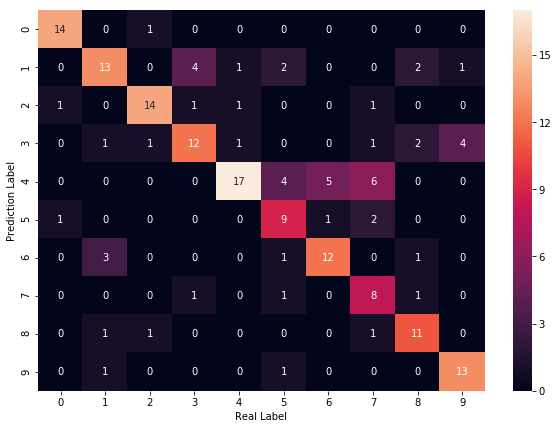

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[1] real:5
#1 min_error:1 index:[2 3 4 7] real:2
#2 min_error:0 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1 6 8] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[1 6 8] real:1
#10 min_error:1 index:[0 2 7] real:7
#11 min_error:0 index:[3] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:0 index:[3] real:3
#16 min_error:0 index:[3] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:1 index:[8 9] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:1 index:[1 6 8] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[6] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:1 index:[1 6 8] real:6
#29 min_error:0 index:[9]

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7149041434755721
Avg Base Learner:0.9018243661100804


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.11666666666666667
Accuracy on training set: 0.12222222222222222
Accuracy on training set: 0.35555555555555557
Accuracy on training set: 0.5277777777777778


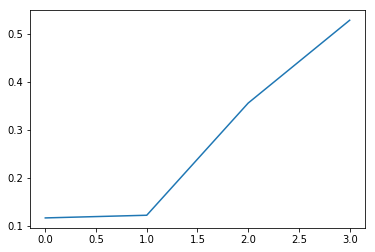

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.11666666666666667,
 0.12222222222222222,
 0.35555555555555557,
 0.5277777777777778]